# Revisão Bibliográfica

https://www.icloud.com/iclouddrive/0adRYGxzRYwbxL-h9pmt8Tnyw#revisao_bibliografica

# Código

In [1]:
import pandas as pd
import sklearn
import scipy.io as sio
import numpy as np
from os import getcwd
from os.path import join 
import matplotlib.pyplot as plt
from scipy.fft import rfft, rfftfreq
from lvm_read import read
from sklearn.datasets import make_regression, make_classification, make_blobs
from sklearn import linear_model, decomposition, preprocessing,metrics, model_selection
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt
import statsmodels.api as sm
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf
import statsmodels.api as sm
from statsmodels.graphics import tsaplots
import matplotlib.pyplot as plt
from sklearn import metrics
from statsmodels.tsa.arima_model import ARIMA
import seaborn as sns


In [2]:
#Carregar os dados. OBS: Renomear o 5.1 do Case L e R para 5
s=2*20+4*5 #numero de arquivos para inicializar o array
data=np.zeros((300000, 40, s))
for i in range (1,21):
    string="white_noise_"+str(i)+".lvm"
    d=read(join(os.getcwd(),'Case_R_(+25)/Case_R_(+25)_1/',string))
    d[0]['Channel names'].pop()
    df=pd.DataFrame(d[0]['data'],columns=d[0]['Channel names'])
    N,Chno=df.shape
    y=N*['1']
    df=pd.concat([df,pd.DataFrame({'target':y})],axis=1)
    f=df.to_numpy()
    f=np.append(f,np.zeros((300000-N,40)),axis=0)
    j=i-1
    data[:,:,j]=f
s=j
for i in range (1,21):
    string="white_noise_"+str(i)+".lvm"
    d=read(join(os.getcwd(),'Case_R_(+25)/Case_R_(+25)_2/',string))
    d[0]['Channel names'].pop()
    df=pd.DataFrame(d[0]['data'],columns=d[0]['Channel names'])
    N,Chno=df.shape
    y=N*['1']
    df=pd.concat([df,pd.DataFrame({'target':y})],axis=1)
    f=df.to_numpy()
    f=np.append(f,np.zeros((300000-N,40)),axis=0)
    j=s+i
    data[:,:,j]=f
s=j
for i in range (1,6):
    string="white_noise_"+str(i)+".lvm"
    d=read(join(os.getcwd(),'Case_L_(+25)/Case_L_(+25)_1/',string))
    d[0]['Channel names'].pop()
    df=pd.DataFrame(d[0]['data'],columns=d[0]['Channel names'])
    N,Chno=df.shape
    y=N*['2']
    df=pd.concat([df,pd.DataFrame({'target':y})],axis=1)
    f=df.to_numpy()
    f=np.append(f,np.zeros((300000-N,40)),axis=0)
    j=s+i
    data[:,:,j]=f
s=j
for i in range (1,6):
    string="white_noise_"+str(i)+".lvm"
    d=read(join(os.getcwd(),'Case_L_(+25)/Case_L_(+25)_2/',string))
    d[0]['Channel names'].pop()
    df=pd.DataFrame(d[0]['data'],columns=d[0]['Channel names'])
    N,Chno=df.shape
    y=N*['2']
    df=pd.concat([df,pd.DataFrame({'target':y})],axis=1)
    f=df.to_numpy()
    f=np.append(f,np.zeros((300000-N,40)),axis=0)
    j=s+i
    data[:,:,j]=f
s=j
for i in range (1,6):
    string="white_noise_"+str(i)+".lvm"
    d=read(join(os.getcwd(),'Case_H_(+25)/Case_H_(+25)_1/',string))
    d[0]['Channel names'].pop()
    df=pd.DataFrame(d[0]['data'],columns=d[0]['Channel names'])
    N,Chno=df.shape
    y=N*['3']
    df=pd.concat([df,pd.DataFrame({'target':y})],axis=1)
    f=df.to_numpy()
    f=np.append(f,np.zeros((300000-N,40)),axis=0)
    j=s+i
    data[:,:,j]=f
s=j
for i in range (1,6):
    string="white_noise_"+str(i)+".lvm"
    d=read(join(os.getcwd(),'Case_H_(+25)/Case_H_(+25)_2/',string))
    d[0]['Channel names'].pop()
    df=pd.DataFrame(d[0]['data'],columns=d[0]['Channel names'])
    N,Chno=df.shape
    y=N*['3']
    df=pd.concat([df,pd.DataFrame({'target':y})],axis=1)
    f=df.to_numpy()
    f=np.append(f,np.zeros((300000-N,40)),axis=0)
    j=s+i
    data[:,:,j]=f
s=j

In [3]:
#Calculo da FFT
Ts = 6 * 1e-4 # sampling time
sample_rate=1666 #Hertz

Ch1 = data[:,13,:] # célula de carga: força do shaker
Ch2 = data[:,1,:] # acelerômetro: 1
Ch1=Ch1[~np.all(Ch1 == 0, axis=1)]
Ch2=Ch2[~np.all(Ch2 == 0, axis=1)]

N,Chno=Ch2.shape

time = (np.linspace(1,N,N) - 1) * Ts

x = rfftfreq(N, 1 / sample_rate)

norm=np.zeros((N,Chno))
for i in range(0,Chno-1):
    n = np.int16((Ch2[:,i] / Ch2[:,i].max()) * 32767)
    norm[:,i]=n

f=np.zeros((110790,Chno))
for i in range(0,Chno-1):
    f[:,i] = rfft(norm[:,i])


/var/folders/td/db5gpbnn15s7f867jp3scyhh0000gn/T/ipykernel_65054/3862301059.py:23: ComplexWarning: Casting complex values to real discards the imaginary part
  f[:,i] = rfft(norm[:,i])


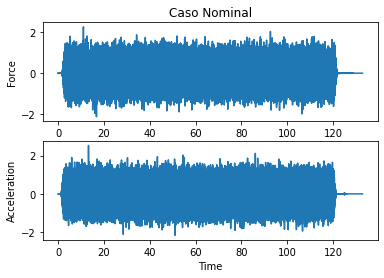

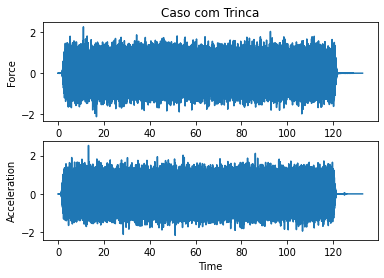

In [4]:
plt.figure()
plt.subplot(211)
plt.title('Caso Nominal')
plt.plot(time,Ch1[:,1])
plt.ylabel('Force')
plt.subplot(212)
plt.plot(time,Ch1[:,55])
plt.xlabel('Time')
plt.ylabel('Acceleration')
plt.show()
plt.subplot(211)
plt.title('Caso com Trinca')
plt.plot(time,Ch1[:,1])
plt.ylabel('Force')
plt.subplot(212)
plt.plot(time,Ch1[:,55])
plt.xlabel('Time')
plt.ylabel('Acceleration')
plt.show()

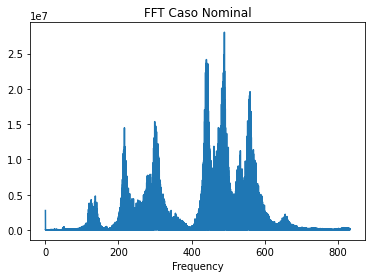

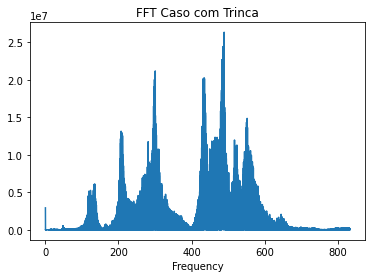

In [5]:
plt.figure()
plt.plot(x, np.abs(f[:,1]))
plt.title('FFT Caso Nominal')
plt.xlabel('Frequency')
plt.show()
plt.plot(x, np.abs(f[:,55]))
plt.title('FFT Caso com Trinca')
plt.xlabel('Frequency')
plt.show()

## PCA

In [9]:
#usei a transposta da FFT porque o Helon me disse que as dimensões estavam trocadas no ultimo email
h=np.transpose(np.real(f))

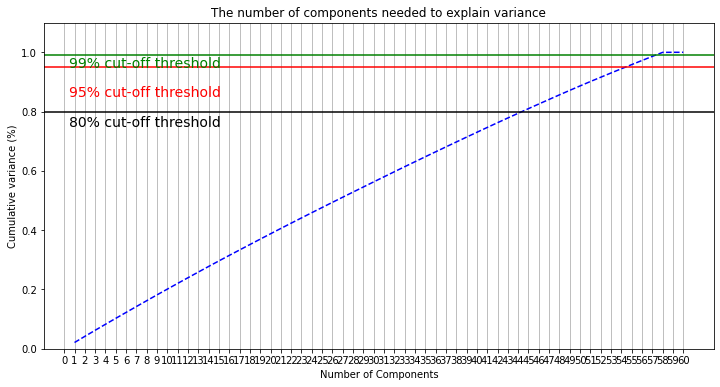

In [10]:
pca = PCA().fit(h)

plt.rcParams["figure.figsize"] = (12,6)
fig, ax = plt.subplots()
xi = np.arange(1, 61, step=1)
yi = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, yi, linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 61, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=14)
plt.axhline(y=0.99, color='g', linestyle='-')
plt.text(0.5, 0.95, '99% cut-off threshold', color = 'green', fontsize=14)
plt.axhline(y=0.80, color='black', linestyle='-')
plt.text(0.5, 0.75, '80% cut-off threshold', color = 'black', fontsize=14)

ax.grid(axis='x')
plt.show()

In [11]:
pca = decomposition.PCA(n_components=0.95) #variancia explicada 97%
PCA = pca.fit_transform(h)
Nc,PCAcomp=PCA.shape
scaler = MinMaxScaler(feature_range=(-1,1))
X=scaler.fit_transform(PCA)

In [ ]:
#fazer grafico do ultimo email